<a href="https://colab.research.google.com/github/VishnuAddagalla/Book-Genre-Classification/blob/master/Copy_of_Copy_of_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Genre Classification using RNNs and LSTM**
The contents of this notebook entail the utilization of deep learning techniques for the purpose of classifying book titles. The system will utilize a matrix that has been trained with GloVe, which is a model that is comparable in its ability to generate word vectors. Two separate data structures will be imported: a Python list containing 400,000 words and a 400,000 by 50 dimension embedding. The contents of this notebook will cover word vectors, recurrent neural networks, and long short-term memory units (LSTMs). Once a comprehensive understanding of these terms is obtained, we will examine code examples and explore a complete Tensorflow sentiment classifier.

Compared to a feedforward network, an RNN is more precise as it considers the sequence of words. NLP tasks necessitate scalar values or matrices consisting of scalar values. Word embedding refers to the vector representation of a word, which is a matrix that includes all vector values associated with the word. The embedding layer is responsible for transmitting new representations to the LSTM cells. These cells add recurrent connections to the network, enabling them to incorporate word sequence information in the data. The LSTM cells are subsequently fed into an output layer that has a sigmoid shape.

![caption](https://github.com/TM-M150/Book-Genre-Classification/blob/master/assets/vectors.png?raw=1)

The text discusses the creation of vectors for book titles using a pretrained model. Each of the 400,000 word vectors in the matrix will have a dimension of 50. Two data structures will be imported: a Python list containing all 400,000 words and a 400,000-by-50-dimensional embedding matrix. Words will be sent to an embedding layer, which will then send them to LSTM cells, which will then add recurrent connections to the network. The LSTM cells will then proceed to a sigmoid output layer.


# **Loading our dependencies**

In [ ]:
# Import necessary dependancies
import numpy as np
import pandas as pd
import re
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# **Generating `wordsList.npy` and `wordsVectors.npy`**

In [ ]:
# Import required libraries
import urllib.request
import zipfile
import io
import numpy as np


# Download the GloVe word embeddings
url = "https://nlp.stanford.edu/data/glove.6B.zip"
with urllib.request.urlopen(url) as u, zipfile.ZipFile(io.BytesIO(u.read())) as zf:
    # Extract the embeddings for 400k words with 50 dimensions
    data = zf.read("glove.6B.50d.txt").decode()
       # Create a dictionary to store word vectors
    embeddings = {}
     # Loop through each line in the file
    for line in data.split("\n"):
        if line:
            # Split the line by whitespace
            values = line.split()
             # The first value is the word
            word = values[0]
            # The remaining values are the vector values, convert to float32 data type
            vector = np.array(values[1:], dtype="float32")
             # Add the word and vector to the embeddings dictionary
            embeddings[word] = vector

    # Create a numpy array of the word vectors
    wordsList = list(embeddings.keys())
    wordVectors = np.array(list(embeddings.values()))

    # Save the word list and word vectors to files
    np.save("/content/wordsList.npy", wordsList)
    np.save("/content/wordVectors.npy", wordVectors)
# Print a message to indicate that the embeddings have been saved
print("Word embeddings saved to wordsList.npy and wordVectors.npy.")

Word embeddings saved to wordsList.npy and wordVectors.npy.


# **Loading `wordsList.npy` and `wordsVectors.npy`**

In [ ]:
import numpy as np
# Load the list of words
wordsList = np.load('wordsList.npy')

# Print confirmation that the list has been loaded
print('Loaded the word list!')

# Convert the numpy array to a regular list
wordsList = wordsList.tolist()

# Load the pre-trained word vectors
wordVectors = np.load('wordVectors.npy')

# Print confirmation that the vectors have been loaded
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [ ]:
# print the first 100 words in wordsList
print(wordsList[:100])

# print the total number of words in wordsList
print(len(wordsList))

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.']
400000


In [ ]:
# Print the 88th row of the wordVectors matrix
print(wordVectors[88])

# Print the shape of the wordVectors matrix
print(wordVectors.shape)

[ 2.9605e-01 -1.3841e-01  4.3774e-02 -3.8744e-01  1.2262e-01 -6.5180e-01
 -2.8240e-01  9.0312e-02 -5.5186e-01  3.2060e-01  3.7422e-03  9.3229e-01
 -2.2034e-01 -2.1922e-01  9.2170e-01  7.5724e-01  8.4892e-01 -4.2197e-03
  5.3626e-01 -1.2667e+00 -6.1028e-01  1.6700e-01  8.2753e-01  6.5765e-01
  4.8959e-01 -1.9744e+00 -1.1490e+00 -2.1461e-01  8.0539e-01 -1.4745e+00
  3.7490e+00  1.0141e+00 -1.1293e+00 -5.2661e-01 -1.2029e-01 -2.7931e-01
  6.5092e-02 -4.3639e-02  6.0426e-01 -2.0892e-01 -4.5739e-01  1.0441e-02
  4.1458e-01  6.8900e-01  1.4468e-01 -3.1973e-02 -4.8073e-02 -1.1279e-04
  1.3854e-01  9.6954e-01]
(400000, 50)


## **Loading the dataset**

In [ ]:
import pandas as pd
# Acces personal Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Reads the data
data = pd.read_csv('/content/drive/MyDrive/Data/book32-listing.csv',encoding = "ISO-8859-1")

Mounted at /content/drive


In [ ]:
# Create a list of column names
columns = ['Id', 'Image', 'Image_link', 'Title', 'Author', 'Class', 'Genre']

# Assign the list of column names to the columns of the data DataFrame
data.columns = columns

In [ ]:
# Create a pandas DataFrame called 'books' with the 'Title' column from the 'data' DataFrame
books = pd.DataFrame(data['Title'])

# Create a pandas DataFrame called 'author' with the 'Author' column from the 'data' DataFrame
author = pd.DataFrame(data['Author'])

# Create a pandas DataFrame called 'genre' with the 'Genre' column from the 'data' DataFrame
genre = pd.DataFrame(data['Genre'])

In [ ]:
# Print the first few rows of the books DataFrame
books.head()

,Title
0,Doug the Pug 2016 Wall Calendar
1,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl..."
2,365 Cats Color Page-A-Day Calendar 2016
3,Sierra Club Engagement Calendar 2016
4,Sierra Club Wilderness Calendar 2016


In [ ]:
# Prints clumn values of the 'genre' dataframe
genre.head()

,Genre
0,Calendars
1,Calendars
2,Calendars
3,Calendars
4,Calendars


In [ ]:
# Prints counts the number of unique values in the “Genre” column
print (len((genre['Genre'].unique())))

# Prints Unique values in the 'Genre' column 
print ((genre['Genre'].unique()))

32
['Calendars' 'Comics & Graphic Novels' 'Test Preparation'
 'Mystery, Thriller & Suspense' 'Science Fiction & Fantasy' 'Romance'
 'Humor & Entertainment' 'Literature & Fiction' 'Gay & Lesbian'
 'Engineering & Transportation' 'Cookbooks, Food & Wine'
 'Crafts, Hobbies & Home' 'Arts & Photography' 'Education & Teaching'
 'Parenting & Relationships' 'Self-Help' 'Computers & Technology'
 'Medical Books' 'Science & Math' 'Health, Fitness & Dieting'
 'Business & Money' 'Law' 'Biographies & Memoirs' 'History'
 'Politics & Social Sciences' 'Reference' 'Christian Books & Bibles'
 'Religion & Spirituality' 'Sports & Outdoors' 'Teen & Young Adult'
 "Children's Books" 'Travel']


In [ ]:
# Calculate the number of books and store it in the numBooks variable
numBooks = len(books)

# Calculate the number of genres and store it in the numGenres variable
numGenres = len(genre)

# Print the number of books
print(numBooks)

# Print the number of genres
print(numGenres)

207571
207571


In [ ]:
# Find the index of the word 'messi' in the wordsList
aWordIndex = wordsList.index('messi')

# Print the index of the word 'messi'
print(aWordIndex)

# Access the row in the wordVectors matrix that corresponds to the word 'messi'
# by using the 'aWordIndex' variable as the index
print(wordVectors[aWordIndex])

# Print the shape of the row corresponding to the word 'messi'
print(wordVectors[aWordIndex].shape)

19087
[ 0.24808   0.032891 -0.062788 -0.45602  -0.15156  -0.6619   -0.5132
 -0.092383 -0.67547   1.9475    1.1308    0.94337  -0.90491   0.18035
  1.1157   -0.32481   0.44242  -0.46054  -1.1966   -0.17732  -1.7263
  0.5043   -0.28464  -0.45795   0.33804  -0.13706   1.2031    0.34261
 -0.58967  -0.70613   0.62696   0.76881  -0.46966  -0.081293  0.39987
  0.89332   0.40821   0.73082   0.077319 -0.81061   0.61938   0.95127
 -0.20063  -0.19441  -0.70711   0.093774  0.99933   0.05538   0.20422
 -1.3665  ]
(50,)


Now that we have our vectors, our first step is taking an input sentence and then constructing its vector representation. Let's say that we have the input sentence "I thought the movie was incredible and inspiring". In order to get the word vectors, we can use Tensorflow's embedding lookup function.

This function takes in two arguments, one for the embedding matrix (the wordVectors matrix in our case), and one for the ids of each of the words. The ids vector can be thought of as the integerized representation of the training set. This is basically just the row index of each of the words.

In [ ]:
# Maximum length of sentence
maxSeqLength = 10 

# Dimensions for each word vector
numDimensions = 300 
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("too")
firstSentence[2] = wordsList.index("had")
firstSentence[3] = wordsList.index("a")
firstSentence[4] = wordsList.index("love")
firstSentence[5] = wordsList.index("story")
#firstSentence[6] = wordsList.index("k")
#firstSentence[7] = wordsList.index("ki")
print(firstSentence.shape)

# Shows the row index for each word
print(firstSentence) 

(10,)
[ 41 317  40   7 835 523   0   0   0   0]


In [ ]:
with tf.Session() as sess:
    print("Word vector for a single word", tf.nn.embedding_lookup(wordVectors, firstSentence).eval()[0])
    print("\n")
    print("Dimension for a single word", tf.nn.embedding_lookup(wordVectors, firstSentence).eval()[0].shape)
    print ('\n')
    print("Shape of the vector for this sentence", tf.nn.embedding_lookup(wordVectors, firstSentence).eval().shape)
    print ("\n")
    print("Vector for this sentence", tf.nn.embedding_lookup(wordVectors, firstSentence).eval())

Word vector for a single word [ 1.1891e-01  1.5255e-01 -8.2073e-02 -7.4144e-01  7.5917e-01 -4.8328e-01
 -3.1009e-01  5.1476e-01 -9.8708e-01  6.1757e-04 -1.5043e-01  8.3770e-01
 -1.0797e+00 -5.1460e-01  1.3188e+00  6.2007e-01  1.3779e-01  4.7108e-01
 -7.2874e-02 -7.2675e-01 -7.4116e-01  7.5263e-01  8.8180e-01  2.9561e-01
  1.3548e+00 -2.5701e+00 -1.3523e+00  4.5880e-01  1.0068e+00 -1.1856e+00
  3.4737e+00  7.7898e-01 -7.2929e-01  2.5102e-01 -2.6156e-01 -3.4684e-01
  5.5841e-01  7.5098e-01  4.9830e-01 -2.6823e-01 -2.7443e-03 -1.8298e-02
 -2.8096e-01  5.5318e-01  3.7706e-02  1.8555e-01 -1.5025e-01 -5.7512e-01
 -2.6671e-01  9.2121e-01]


Dimension for a single word (50,)


Shape of the vector for this sentence (10, 50)


Vector for this sentence [[ 1.1891e-01  1.5255e-01 -8.2073e-02 -7.4144e-01  7.5917e-01 -4.8328e-01
  -3.1009e-01  5.1476e-01 -9.8708e-01  6.1757e-04 -1.5043e-01  8.3770e-01
  -1.0797e+00 -5.1460e-01  1.3188e+00  6.2007e-01  1.3779e-01  4.7108e-01
  -7.2874e-02 -7.2675e-01 

# **Data Pipeline**

![caption](https://github.com/TM-M150/Book-Genre-Classification/blob/master/assets/pipeline.png?raw=1)

## **Basic dataset Exploration**

In [ ]:
numWords = []
for i,j in enumerate(books['Title']):
    counter = len(j.split())
    numWords.append(counter)       

In [ ]:
print('The total number of words in all books is', sum(numWords))
print('The average number of words in the each book title is', sum(numWords)/len(numWords))

The total number of words in all books is 1900083
The average number of words in the each book title is 9.153894330132822


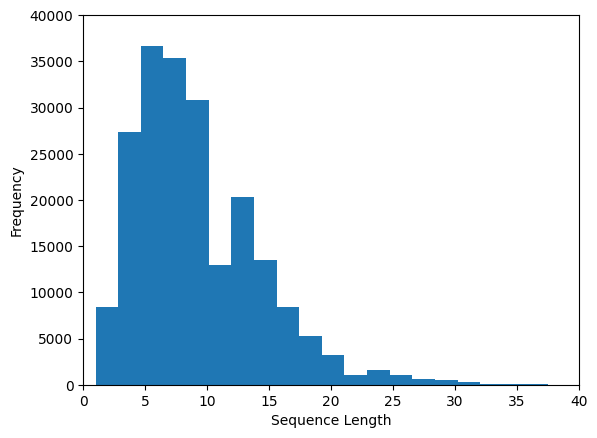

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 40)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 40, 0, 40000])
plt.show()

From the histogram as well as the average number of words, book title are 10 words, which is less than max sequence length value we will set. 

In [ ]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [ ]:
print (books['Title'][0])
print (cleanSentences(books['Title'][0]))
print ('\n')
print (books['Title'][100000])
print (cleanSentences(books['Title'][100000]))
print ('\n')
print (books['Title'][33330])
print (cleanSentences(books['Title'][33330]))
print ('\n')
print (books['Title'][8889])
print (cleanSentences(books['Title'][8889]))
print ('\n')
print (books['Title'][70000])
print (cleanSentences(books['Title'][70000]))
print ('\n')
print (books['Title'][200000])
print (cleanSentences(books['Title'][200000]))

Doug the Pug 2016 Wall Calendar
doug the pug 2016 wall calendar


Face Reading in Chinese Medicine, 2e
face reading in chinese medicine 2e


Bare-Bones Meditation: Waking Up from the Story of My Life
barebones meditation waking up from the story of my life


The Last Taxi Ride: A Ranjit Singh Novel
the last taxi ride a ranjit singh novel


CCNA Routing and Switching ICND2 200-101 Official Cert Guide
ccna routing and switching icnd2 200101 official cert guide


City Secrets Paris: The Essential Insider's Guide
city secrets paris the essential insiders guide


We will keep our vector sequence length equal to 20.

In [ ]:
maxSeqLength = 20

In [ ]:
%%time

import os

features = np.zeros((numBooks, maxSeqLength), dtype='int32')

fileCounter = 0

for i, j in enumerate(books['Title']): 
    indexCounter = 0
    cleanedLine = cleanSentences(j)
    split = cleanedLine.split()
    for word in split:
        try:
            features[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            features[fileCounter][indexCounter] = 399999 # Vector for unknown words
        indexCounter = indexCounter + 1
        if indexCounter >= maxSeqLength:
            break
    fileCounter = fileCounter + 1 

# Create the 'features' directory if it doesn't exist
if not os.path.exists('features'):
    os.makedirs('features')

# Save the features array in the 'features' directory
np.save('features/idsMatrix20_1.npy', features)

CPU times: user 13min 3s, sys: 2.4 s, total: 13min 5s
Wall time: 13min 17s


We have already created idMatrices for sequences 10,20 and 50. You can choose different matrix for experiemtnal purpose

In [ ]:
features = np.load('features/idsMatrix20_1.npy')

In [ ]:
features.shape

(207571, 20)

First Book title from our dataset

In [ ]:
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("doug")
firstSentence[1] = wordsList.index("the")
firstSentence[2] = wordsList.index("pug")
firstSentence[3] = wordsList.index("2016")
firstSentence[4] = wordsList.index("wall")
firstSentence[5] = wordsList.index("calendar")
print(firstSentence) #Shows the row index for each word

[ 6406     0 65579 15463  1015  5657     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]


In [ ]:
print (books['Title'][0])
features[0]

Doug the Pug 2016 Wall Calendar


array([ 6406,     0, 65579, 15463,  1015,  5657,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

Converting genres(labels) using LabelEncoder and keras' to_categorical function

In [ ]:
from sklearn.preprocessing import LabelEncoder

feat = ['Genre']
for x in feat:
    le = LabelEncoder()
    le.fit(list(genre[x].values))
    genre[x] = le.transform(list(genre[x]))

In [ ]:
from keras.utils.np_utils import to_categorical
target = to_categorical(genre['Genre'], 32)

In [ ]:
target.shape

(207571, 32)

## Splitting into training and test set

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.10)

In [ ]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(186813, 20)
(186813, 32)
(20758, 20)
(20758, 32)


## **Defining out hyperparameters**

Choosing the right values for your hyperparameters is a crucial part of training deep neural networks effectively. You'll find that your training loss curves can vary with your choice of optimizer (Adam, Adadelta, SGD, etc), learning rate, and network architecture. With RNNs and LSTMs in particular, some other important factors include the number of LSTM units and the size of the word vectors.

* Learning Rate: RNNs are infamous for being diffult to train because of the large number of time steps they have. Learning rate becomes extremely important since we don't want our weight values to fluctuate wildly as a result of a large learning rate, nor do we want a slow training process due to a low learning rate. The default value of 0.001 is a good place to start. You should increase this value if the training loss is changing very slowly, and decrease if the loss is unstable.  
* Optimizer: There isn't a consensus choice among researchers, but Adam has been widely popular due to having the adaptive learning rate property (Keep in mind that optimal learning rates can differ with the choice of optimizer).
* Number of LSTM units: This value is largely dependent on the average length of your input texts. While a greater number of units provides more expressibility for the model and allows the model to store more information for longer texts, the network will take longer to train and will be computationally expensive. 
* Word Vector Size: Dimensions for word vectors generally range from 50 to 300. A larger size means that the vector is able to encapsulate more information about the word, but you should also expect a more computationally expensive model. 

In [ ]:
batchSize = 64
lstmUnits = 2
numClasses = 32
iterations = 10
numDimensions = 20

# **Helper Function to get batches**

In [ ]:
def get_batches(x, y, batch_size=100):
    
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

## **Model**

Defining Placeholders for input and labels






The tf.nn.rnn_cell.BasicLSTMCell  function takes in an integer for the number of LSTM units that we want. This is one of the hyperparameters that will take some tuning to figure out the optimal value. We’ll then wrap that LSTM cell in a dropout layer to help prevent the network from overfitting.

In [ ]:
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

## **Embedding**
Now we'll add an embedding layer. We need to do this because there are 1900083 words in our vocabulary. It is massively inefficient to one-hot encode our classes here. Instead of one-hot encoding, we can have an embedding layer and use that layer as a lookup table.

In [ ]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors, input_data)

Next, we'll create our LSTM cells to use in the recurrent network (TensorFlow documentation). Here we are just defining what the cells look like. This isn't actually building the graph, just defining the type of cells we want in our graph.

The tf.nn.rnn_cell.BasicLSTMCell function takes in an integer for the number of LSTM units that we want. This is one of the hyperparameters that will take some tuning to figure out the optimal value. We’ll then wrap that LSTM cell in a dropout layer to help prevent the network from overfitting.



In [ ]:
import tensorflow as tf

lstmCell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(lstmUnits)
lstmCell = tf.compat.v1.nn.rnn_cell.DropoutWrapper(cell=lstmCell, output_keep_prob=0.50)
value, _ = tf.compat.v1.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

<ipython-input-40-ccc6b6913b17>:3: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstmCell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(lstmUnits)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


The first output of the dynamic RNN function can be thought of as the last hidden state vector. This vector will be reshaped and then multiplied by a final weight matrix and a bias term to obtain the final output values.

In [ ]:
import tensorflow.compat.v1 as tf
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

Next, we’ll define correct prediction and accuracy metrics to track how the network is doing. The correct prediction formulation works by looking at the index of the maximum value of the 2 output values, and then seeing whether it matches with the training labels.

In [ ]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

Calculating loss and defining optimizer

In [ ]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Training 

In [ ]:
%%time
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    for ii, (x, y) in enumerate(get_batches(X_train, y_train, batch_size = batchSize)):
        sess.run(optimizer, {input_data: x, labels: y})
        #acc,loss = sess.run([accuracy,loss], {input_data: x, labels: y})
    print("Loss for {} epoch: {}".format(i, (sess.run(loss, {input_data: x, labels: y}))))    
    print("Accuracy for {} epoch: {}".format(i, (sess.run(accuracy, {input_data: x, labels: y})) * 100))
    
save_path = saver.save(sess, "models/test.ckpt", global_step=i)  

Loss for 0 epoch: 3.248265027999878
Accuracy for 0 epoch: 12.5
Loss for 1 epoch: 3.0414371490478516
Accuracy for 1 epoch: 7.8125
Loss for 2 epoch: 2.9603521823883057
Accuracy for 2 epoch: 20.3125
Loss for 3 epoch: 3.0331954956054688
Accuracy for 3 epoch: 17.1875
Loss for 4 epoch: 2.9430646896362305
Accuracy for 4 epoch: 14.0625
Loss for 5 epoch: 3.109239101409912
Accuracy for 5 epoch: 12.5
Loss for 6 epoch: 2.9724206924438477
Accuracy for 6 epoch: 17.1875
Loss for 7 epoch: 2.9824743270874023
Accuracy for 7 epoch: 15.625
Loss for 8 epoch: 2.9535484313964844
Accuracy for 8 epoch: 18.75
Loss for 9 epoch: 2.9334988594055176
Accuracy for 9 epoch: 17.1875
CPU times: user 4min 27s, sys: 8.28 s, total: 4min 36s
Wall time: 3min 11s


In [ ]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
sess = tf.compat.v1.InteractiveSession()
saver = tf.compat.v1.train.Saver()
saver.restore(sess, tf.compat.v1.train.latest_checkpoint('/content/models'))

### Testing

In [ ]:
for i in range(iterations):
    for ii, (x, y) in enumerate(get_batches(X_test, y_test, batch_size = batchSize)):
        if (ii % 30000 ==0):
            print ("Accuracy for {} epoch: {}".format(i, (sess.run(accuracy, {input_data: x, labels: y})) * 100))

Accuracy for 0 epoch: 20.3125
Accuracy for 1 epoch: 17.1875
Accuracy for 2 epoch: 20.3125
Accuracy for 3 epoch: 17.1875
Accuracy for 4 epoch: 23.4375
Accuracy for 5 epoch: 23.4375
Accuracy for 6 epoch: 12.5
Accuracy for 7 epoch: 10.9375
Accuracy for 8 epoch: 18.75
Accuracy for 9 epoch: 17.1875
